In [454]:
import pandas as pd
import numpy as np  


In [510]:
num_samples = 10

random_state = 16

num_of_ratios = 5

Explore the metadata file

In [511]:
metadata = pd.read_csv("../Data/metadata.csv")

metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 58.5+ KB


In [512]:
metadata.head()

sample_id  split instrument_type             features_path  \
0     S0000  train      commercial  train_features/S0000.csv   
1     S0001  train      commercial  train_features/S0001.csv   
2     S0002  train      commercial  train_features/S0002.csv   
3     S0003  train      commercial  train_features/S0003.csv   
4     S0004  train      commercial  train_features/S0004.csv   

                  features_md5_hash  
0  017b9a71a702e81a828e6242aa15f049  
1  0d09840214054d254bd49436c6a6f315  
2  3f58b3c9b001bfed6ed4e4f757083e09  
3  e9a12f96114a2fda60b36f4c0f513fb1  
4  b67603d3931897bfa796ac42cc16de78

We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [513]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

sample_id  split instrument_type                     features_path  \
0     S0000  train      commercial  ../Data/train_features/S0000.csv   
1     S0001  train      commercial  ../Data/train_features/S0001.csv   
2     S0002  train      commercial  ../Data/train_features/S0002.csv   
3     S0003  train      commercial  ../Data/train_features/S0003.csv   
4     S0004  train      commercial  ../Data/train_features/S0004.csv   

                  features_md5_hash  
0  017b9a71a702e81a828e6242aa15f049  
1  0d09840214054d254bd49436c6a6f315  
2  3f58b3c9b001bfed6ed4e4f757083e09  
3  e9a12f96114a2fda60b36f4c0f513fb1  
4  b67603d3931897bfa796ac42cc16de78

Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded.

In [514]:
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()

# creates a dictionary that contains a path for each sample

Check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [515]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now examine the train_labels.csv file

In [516]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

basalt  carbonate  chloride  iron_oxide  oxalate  oxychlorine  \
sample_id                                                                  
S0000           0          0         0           0        0            0   
S0001           0          1         0           0        0            0   
S0002           0          0         0           0        0            1   
S0003           0          1         0           1        0            0   
S0004           0          0         0           1        0            1   

           phyllosilicate  silicate  sulfate  sulfide  
sample_id                                              
S0000                   0         0        1        0  
S0001                   0         0        0        0  
S0002                   0         0        0        0  
S0003                   0         0        1        0  
S0004                   1         0        0        0

We can see what proportion of the labels contains each ion

In [517]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [518]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)


['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

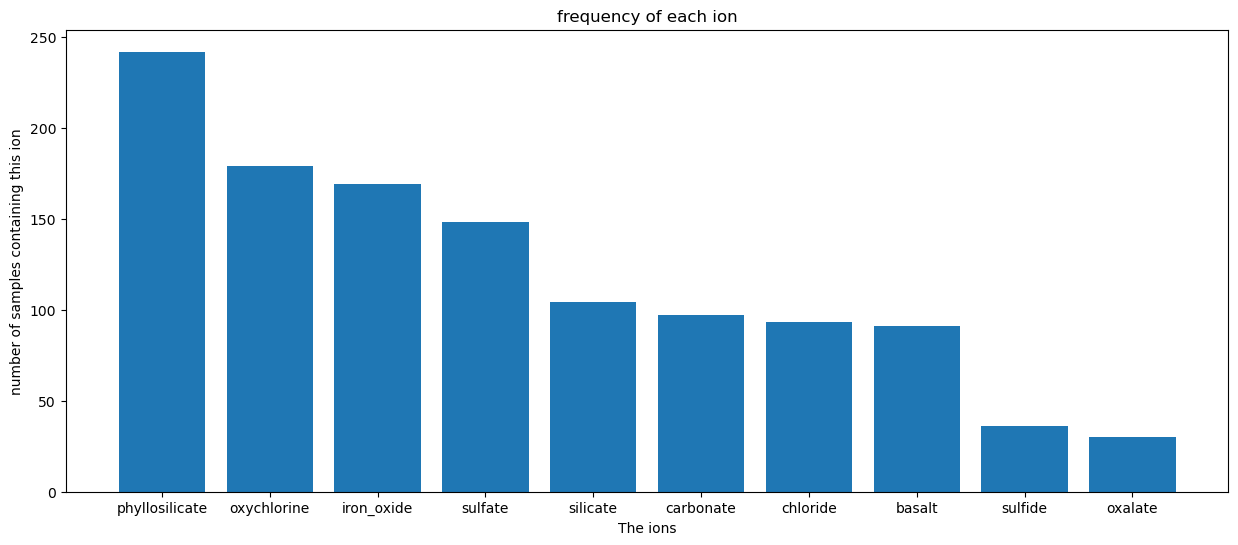

In [519]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



In [520]:
metadata[metadata.split !='test'].sample(5,random_state=random_state)

sample_id  split instrument_type                     features_path  \
30      S0030  train      commercial  ../Data/train_features/S0030.csv   
457     S0457  train      commercial  ../Data/train_features/S0457.csv   
315     S0315  train      commercial  ../Data/train_features/S0315.csv   
695     S0695  train      commercial  ../Data/train_features/S0695.csv   
639     S0639  train      commercial  ../Data/train_features/S0639.csv   

                    features_md5_hash  
30   3f109222fc2eaf306367a34928b7d29e  
457  2eba9eaf30a9fc395aadecc2e96329a0  
315  d0a0e3ed1b2cf1a2e9c3b7cfb9c41f19  
695  862aaab82267ca9043de24d65daa4e0e  
639  8a8196d4d294dbd5729f9c2e7730c023

Create a dictionary containing num_samples entries, with each entry being a dataframe corresponding to a sample. The sample identifier is used as the corresponding key. The samples are chosen at random from all of the samples except the "test" ones, to which we have no access. By taking num_samples to be the total number of samples one obtains a large dictionary with all samples there.

In [521]:
Dict = {}

metadata_slice = metadata[metadata.split !='test'].sample(num_samples,random_state=random_state)

for i, sample in enumerate(metadata_slice.sample_id):

    Dict[sample] = pd.read_csv( metadata_slice['features_path'].iloc[i])

Test this: choose the first entry in the dictionary.

In [522]:
Dict[metadata_slice.sample_id.iloc[0]]

time     temp   m/z     abundance
0         0.00   29.814   0.0  8.437885e-11
1         0.00   29.814   1.0  1.289016e-10
2         0.00   29.814   2.0  3.706687e-11
3         0.00   29.814   3.0  8.730649e-11
4         0.00   29.814   4.0  1.020082e-07
...        ...      ...   ...           ...
31895  1657.68  999.284  95.0  2.234883e-13
31896  1657.68  999.284  96.0  2.327381e-13
31897  1657.68  999.284  97.0  2.495188e-13
31898  1657.68  999.284  98.0  2.650069e-13
31899  1657.68  999.284  99.0  2.714654e-13

[31900 rows x 4 columns]

For the samples in our dictionary we plot temperature as a function of time.

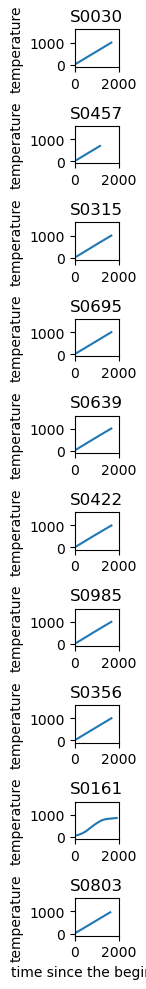

In [523]:

# Create a figure and an array of subplots indexed using ax

fig, ax = plt.subplots(num_samples,sharey = True,height_ratios=0.4*np.ones(num_samples))


for i, sample in enumerate(metadata_slice.sample_id): 

    ax[i].plot(Dict[sample].time,Dict[sample].temp)
    
    ax[i].set(xlim = (-1,2000),ylim = (-100,1600))

    ax[i].set_aspect('equal','box')
    
    plt.xlabel('time since the beginning')
    
    ax[i].set_ylabel('temperature')
    
    ax[i].set_title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



One can see the plots corresponding to various samples by running all cells above.

Now we plot the various ions grouped by m/z, on a logarithmic scale.

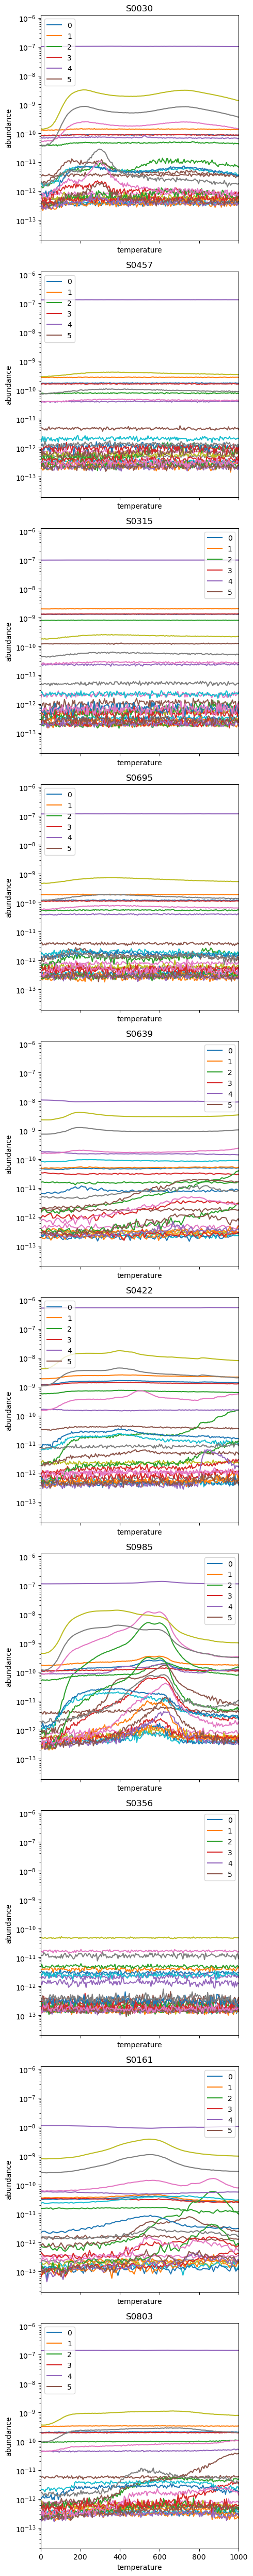

In [524]:
fig, ax = plt.subplots(num_samples,1,sharex = True,sharey = True,figsize = (5,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):

    

    plt.subplot(num_samples,1,i+1)

    

    for mz in range(0,28):
        X = Dict[sample][Dict[sample]['m/z'] == mz].time
        y = Dict[sample][Dict[sample]['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")

        
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()


    
    plt.yscale('log')
    plt.title(sample)
    



fig.tight_layout()     
    
fig.show()






We do the data cleaning suggested by the post. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [525]:

def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

# Check that indeed some values were dropped

for sample in Dict:

    Dataframe = Dict[sample]

    print ('Before the cleaning there were',len(Dataframe),'entries corresponding to',sample)

    Dataframe_clean = drop_non_int_and_He(Dataframe)

    print ('After the cleaning there are',len(Dataframe_clean),'entries corresponding to',sample)



Before the cleaning there were 31900 entries corresponding to S0030
After the cleaning there are 31581 entries corresponding to S0030
Before the cleaning there were 22000 entries corresponding to S0457
After the cleaning there are 21780 entries corresponding to S0457
Before the cleaning there were 31900 entries corresponding to S0315
After the cleaning there are 31581 entries corresponding to S0315
Before the cleaning there were 31900 entries corresponding to S0695
After the cleaning there are 31581 entries corresponding to S0695
Before the cleaning there were 32400 entries corresponding to S0639
After the cleaning there are 16038 entries corresponding to S0639
Before the cleaning there were 31900 entries corresponding to S0422
After the cleaning there are 31581 entries corresponding to S0422
Before the cleaning there were 31800 entries corresponding to S0985
After the cleaning there are 31482 entries corresponding to S0985
Before the cleaning there were 32000 entries corresponding to 

In [526]:
def subtract_min(df):

    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )

    return df


The next function scales the abundances by the formula $\frac{x-x_{\mathrm{min}}}{x_{max}-x_{min}}$ and forces them to be in the range (0,1)

In [527]:
from sklearn.preprocessing import minmax_scale

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    


In [528]:
def preprocess(df):
    return scale_to_zero_one(subtract_min(drop_non_int_and_He(df)))

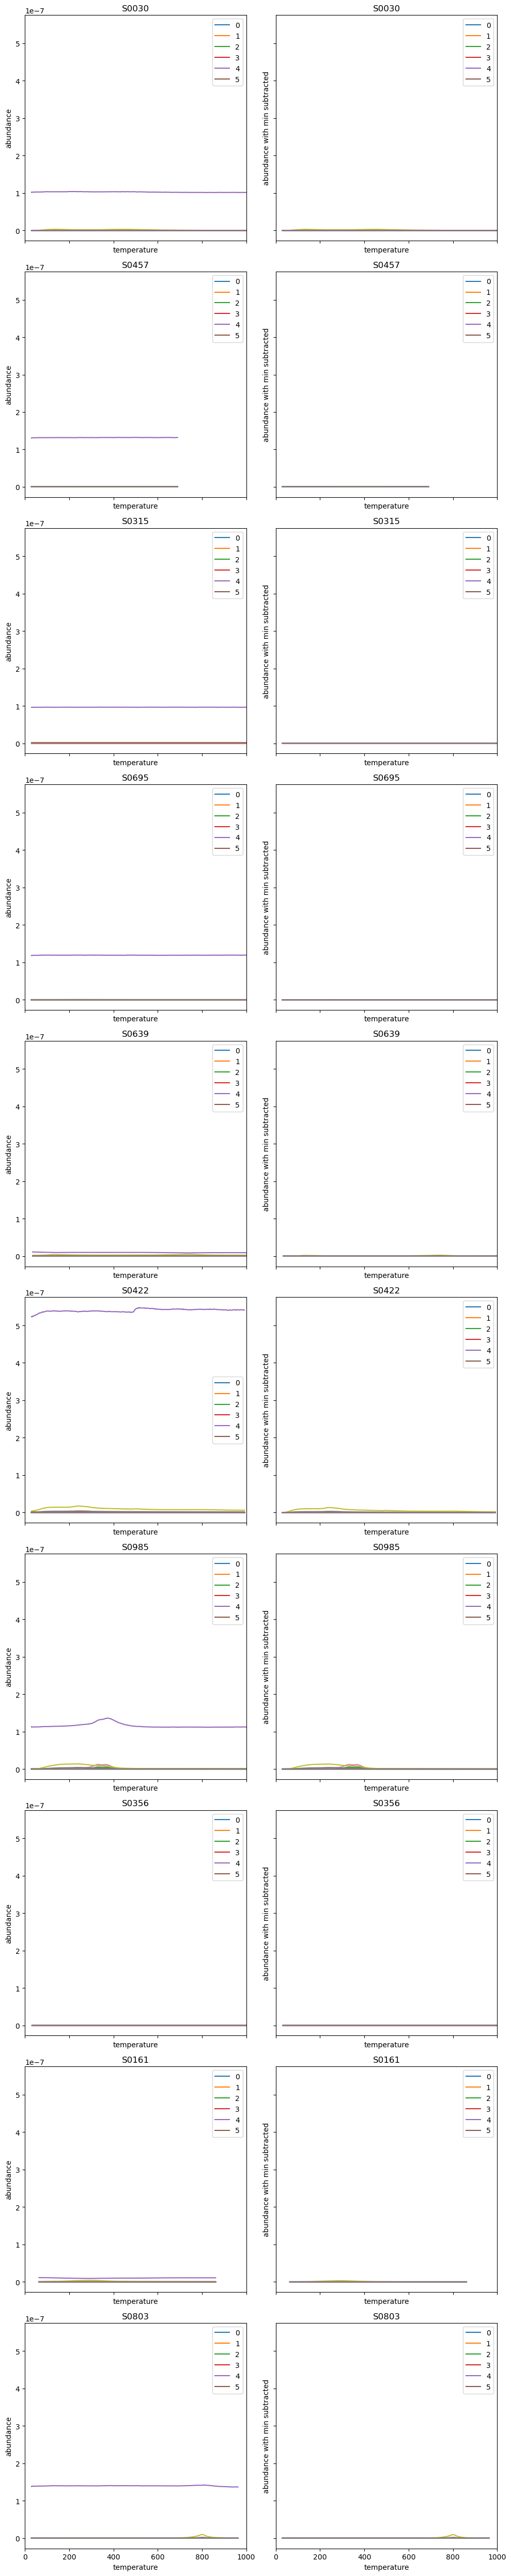

In [529]:
fig, ax = plt.subplots(num_samples,2,sharex = True,sharey = True,figsize = (10,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):



    df = Dict[sample]

    df_mod = subtract_min(drop_non_int_and_He(Dict[sample]))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].abundance_minsub

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Now we plot our samples with the 0-1 rescaling included

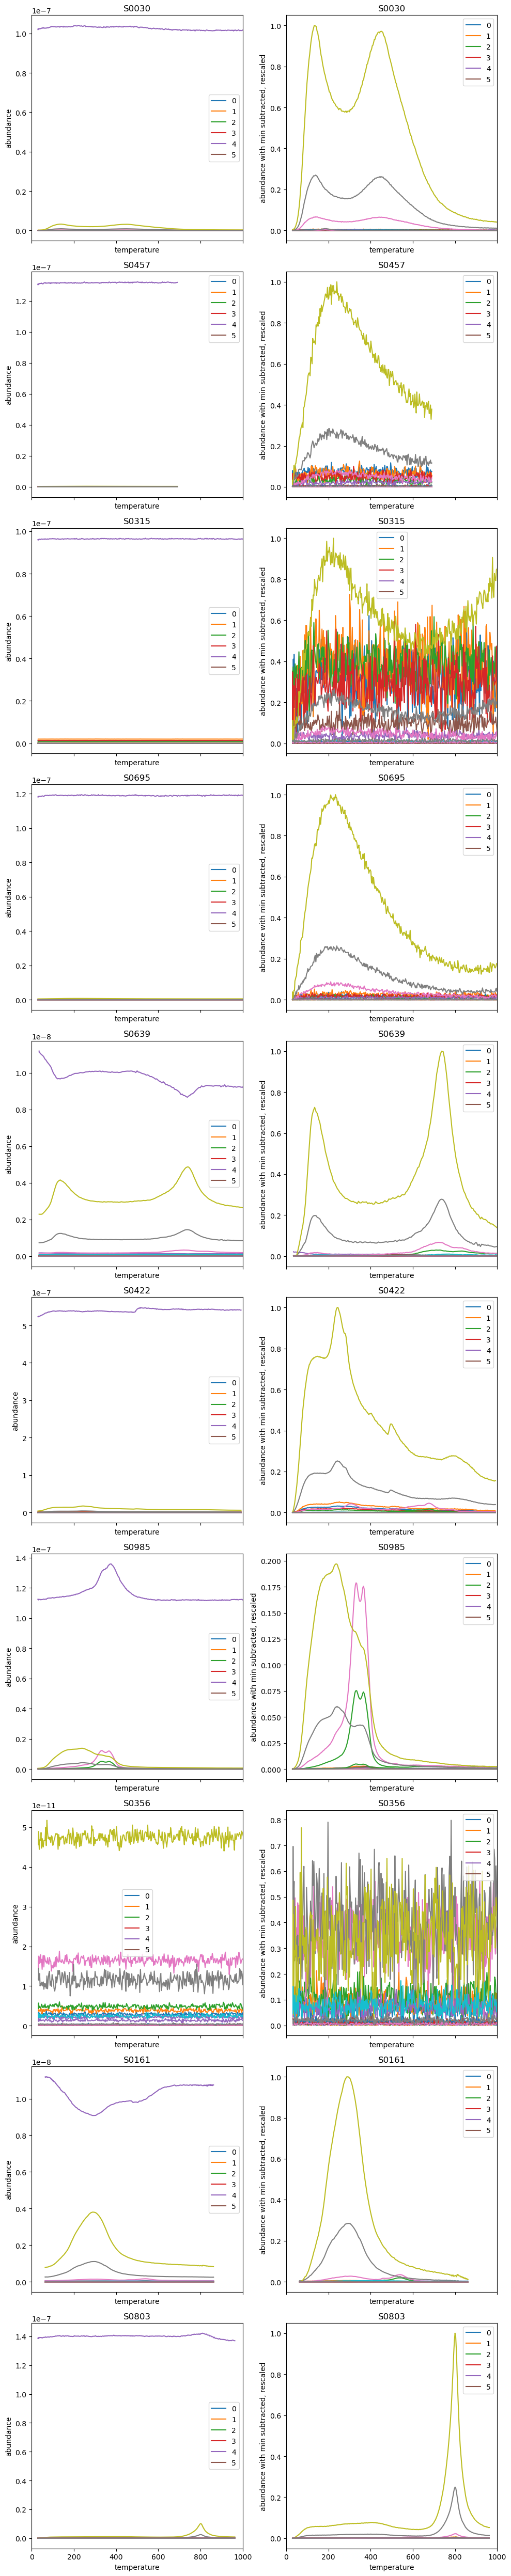

In [530]:
fig, ax = plt.subplots(num_samples,2,sharex = True,figsize = (10,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):



    df = Dict[sample]

    df_mod = scale_to_zero_one(subtract_min(drop_non_int_and_He(Dict[sample])))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Check for memory issues

In [531]:
print (Dict.keys())

dict_keys(['S0030', 'S0457', 'S0315', 'S0695', 'S0639', 'S0422', 'S0985', 'S0356', 'S0161', 'S0803'])


In [532]:

for key in Dict.keys():
    print(Dict[key].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       31900 non-null  float64
 1   temp       31900 non-null  float64
 2   m/z        31900 non-null  float64
 3   abundance  31900 non-null  float64
dtypes: float64(4)
memory usage: 997.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       22000 non-null  float64
 1   temp       22000 non-null  float64
 2   m/z        22000 non-null  float64
 3   abundance  22000 non-null  float64
dtypes: float64(4)
memory usage: 687.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       31900 

It seems that each sample dataframe contributes about 1 MB of data, so loading them all would take something in the order of magnitude of 1GB

Now we will write a function that processes it. 

In [533]:
# The following takes in a dataframe with a zero_one_rescale column and returns a list 

def find_relevant_ratios(df):

    # check if there are 99 or 100 values for m/z

    num_of_ratios = int(df["m/z"].values.max())    

    # the fist column will store the value of m/z, the second the corresponding mean and the third the std_dev. The fourth is the sum.

    comp_table = np.zeros((num_of_ratios,4)) 

    for i in range(num_of_ratios):
        
        comp_table[i,0] = int(i+1) # ratio values start at 1        

        if i!=3: # m/z=4 is already out
            df_temp = df.loc[df["m/z"]==i+1].sort_values('temp')
            
            comp_table[i,1] = df_temp.zero_one_rescale.values.mean()
            comp_table[i,2] = df_temp.zero_one_rescale.values.std()
            comp_table[i,3] = comp_table[i,1]+comp_table[i,2]
            
            del df_temp
    
    # now we sort the table with respect to highest sum of mean and standard deviation
    
    comp_table[comp_table[:,3].argsort()[::-1]]

    # we return the five most relevant values of m/z

    return comp_table[comp_table[:,3].argsort()[::-1]][:5,0]



Check that it works:

In [534]:
for key in Dict.keys():
    df = preprocess(Dict[key])
    print( find_relevant_ratios(df))

[18. 17. 32. 16. 44.]
[18. 32. 17. 28.  1.]
[18.  1.  2.  3. 32.]
[18. 32. 17. 28. 16.]
[18. 44. 17. 28. 16.]
[18. 17. 44. 32.  1.]
[44. 18. 28. 16. 17.]
[32. 17. 18. 16. 28.]
[18. 17. 44. 35. 28.]
[18. 17. 32. 16. 44.]


The following puts together what we have done. It first creates a standardized column, then it selects the most relevant features and gets rid of the rest. It returns a new data frame containing only the most relevant values of m/z

In [535]:
def reduce_data_frame(df):
    df_temp = preprocess(df)
    relevant_ratios = find_relevant_ratios(df_temp)

    df_temp = df_temp[df_temp['m/z'].isin(relevant_ratios)]
    
    return df_temp



Check that it works on an example

In [538]:
df = Dict[list(Dict.keys())[2]]

df_processed = reduce_data_frame(df)

print(set(df_processed['m/z'].values))

{32.0, 1.0, 2.0, 3.0, 18.0}


Now create plots to see what's going on

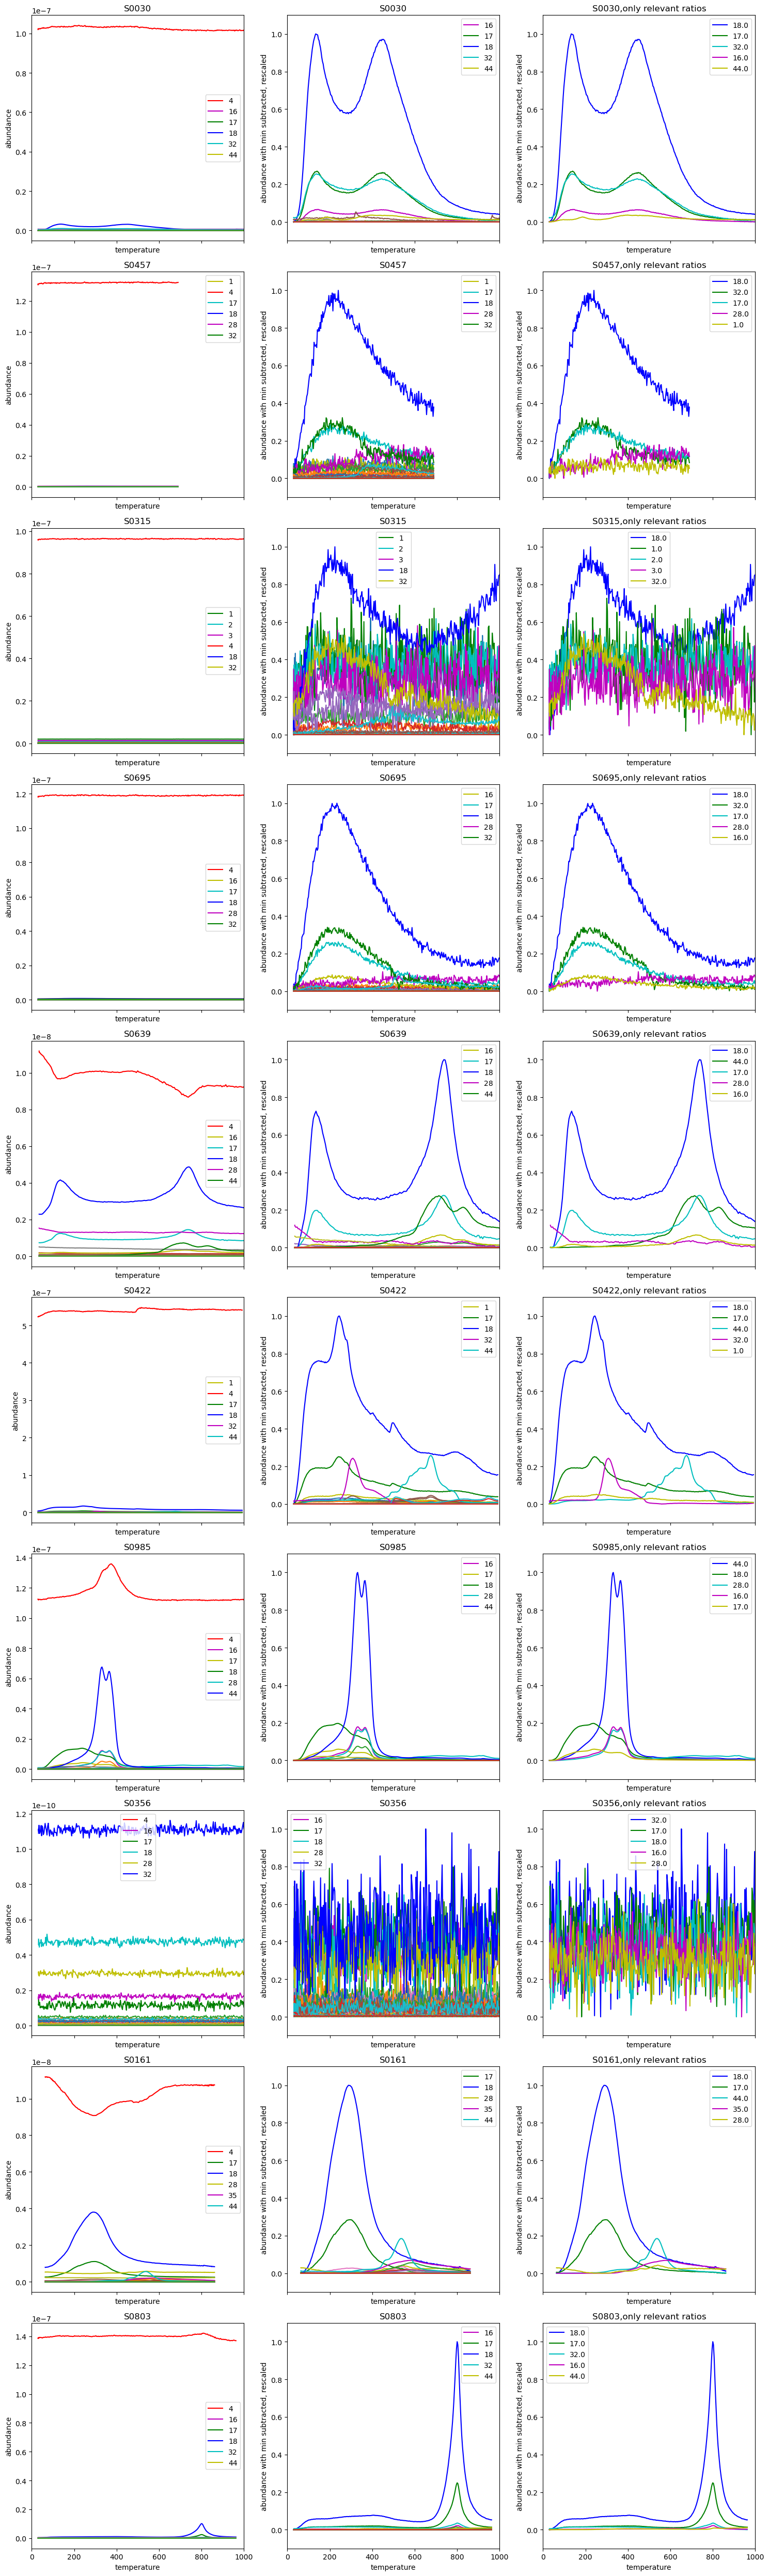

In [539]:
import warnings
warnings.filterwarnings("ignore") # ignore some annoying warnings

colors = ['b','g','c','m','y','r']


num_columns = 3

fig, ax = plt.subplots(num_samples,num_columns,sharex = True,figsize = (5*num_columns,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):

    # Load the dataframe

    df = Dict[sample]

    # Preprocess it

    df_mod = preprocess(Dict[sample])

    relevant_ratios = find_relevant_ratios(df_mod)
    

    plt.subplot(num_samples,num_columns,num_columns*i+1)    

    for mz in range(0,99):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in np.append(relevant_ratios,[4]):
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(np.append(relevant_ratios,[4])==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,num_columns,num_columns*i+2)    

    for mz in range(0,99):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in relevant_ratios:
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    plt.subplot(num_samples,num_columns,num_columns*i+3)
    
    for mz in relevant_ratios:
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show all legends            
        
        plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        
        
        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample+",only relevant ratios")
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    



fig.tight_layout()     
    
fig.show()


